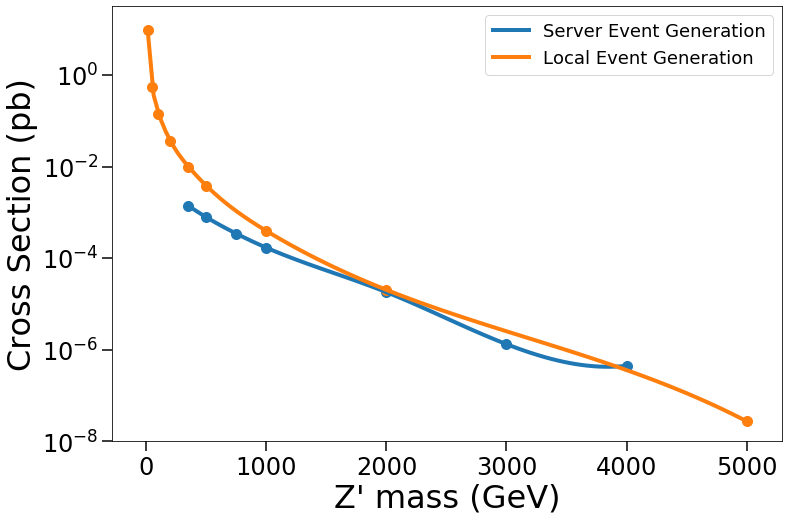

In [318]:
settings = {'axes.labelsize': 32,
            'xtick.major.size': 10,
            'xtick.major.width': 1.5,
            'xtick.labelsize': 24,
            'ytick.major.size': 10,
            'ytick.major.width': 1.5,
            'ytick.labelsize': 24,
            'legend.fontsize': 18,
            'lines.linewidth': 4,
            'lines.markersize': 10,
            'figure.figsize': (12,8)}
with plt.rc_context(settings):
    M_ms = [350, 500, 750, 1000, 2000, 3000, 4000] # GeV
    M_cs = [0.001395, 0.0007823, 0.0003429, 0.0001692, 1.808e-05, 1.325e-06, 4.456e-07] # pb
    E_ms = [10, 50, 100, 200, 350, 500, 1000, 2000, 5000] # GeV
    E_cs = [9.801, 0.5445, 0.1442, 0.03622, 0.009998, 0.003802, 0.0003936, 2.034e-05, 2.748e-08] # pb
    M_pts, M_interp = interp1D(M_ms, np.log10(M_cs), xlabel="Z' mass (GeV)", ylabel='Cross Section', res=100, plot=False)
    E_pts, E_interp = interp1D(E_ms, np.log10(E_cs), xlabel="Z' mass (GeV)", ylabel='Cross Section', res=100, plot=False)
    M_interp = np.power(10, M_interp)
    E_interp = np.power(10, E_interp)
    plt.plot(M_pts, M_interp, label='Server Event Generation')
    plt.plot(E_pts, E_interp, label='Local Event Generation')
    plt.scatter(M_ms, M_cs)
    plt.scatter(E_ms, E_cs)
    plt.ylabel('Cross Section (pb)');
    plt.xlabel("Z' mass (GeV)");
    plt.ylim(10**-8, 10**1.5)
    plt.yscale('log')
    plt.legend()
    plt.savefig('./06-18_plots/sig_cross_secs.png', dpi=200)

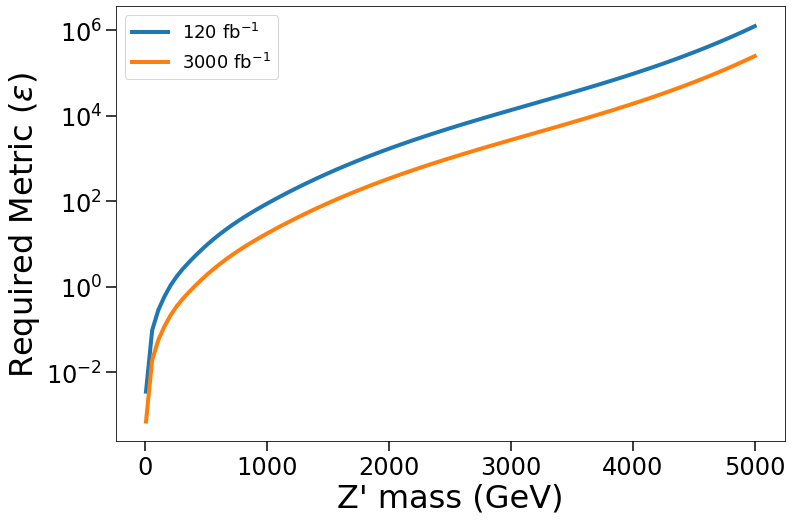

In [321]:
with plt.rc_context(settings):
    E_bg_cs = 0.106e-12 + 0.0117e-12 + 5.58e-12
    M_bg_cs = 0.1339e-12 + 0.01187e-12 + 5.603e-12
    metric_req_l120 = 5 / (E_interp * 10**-12 * np.sqrt(120e15/E_bg_cs))
    metric_req_l3000 = 5 / (E_interp * 10**-12 * np.sqrt(3000e15/E_bg_cs))
    plt.plot(E_pts, metric_req_l120, label=r'120 fb$^{-1}$')
    plt.plot(E_pts, metric_req_l3000, label=r'3000 fb$^{-1}$')
    plt.xlabel("Z' mass (GeV)")
    plt.ylabel("Required Metric ($\epsilon$)")
    plt.yscale('log')
    plt.legend()
    plt.savefig('./06-18_plots/req_metrics.png', dpi=200)

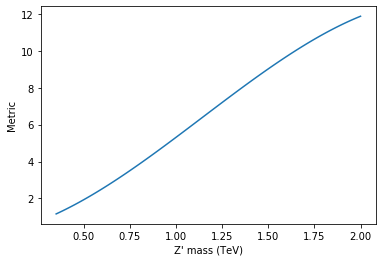

In [277]:
path = '../saved_models/log_reg/log_reg_'
models = [
    sigbg_model(joblib.load(path + name + '.joblib'), train, test) for name, train, test in zip(names, trains, tests)]
logreg_metrics = [model.metric() for model in models]
interp1D([0.35, 1, 1.5, 2], logreg_metrics[2:], xlabel="Z' mass (TeV)", ylabel='Metric');

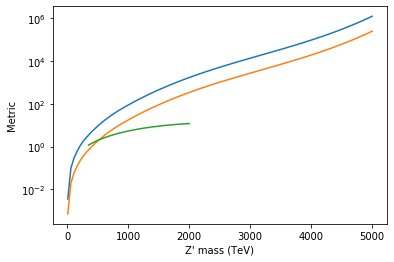

In [228]:
plt.plot(E_pts, metric_req_l120)
plt.plot(E_pts, metric_req_l3000)
interp1D([350, 1000, 1500, 2000], logreg_metrics[2:], xlabel="Z' mass (TeV)", ylabel='Metric');
plt.yscale('log')

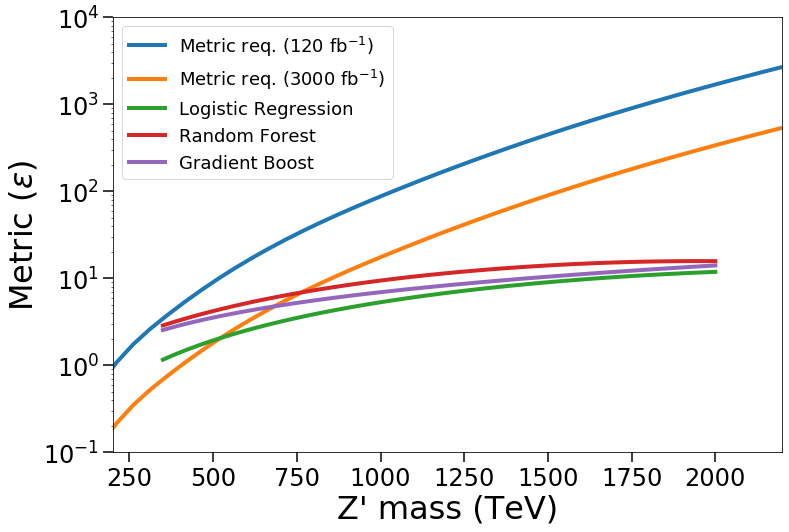

In [315]:
with plt.rc_context(settings):
    randforest_metrics = [2.876882619824351, 9.429745007638907, 14.071424945612296, 15.74814274763853]
    gradboost_metrics = [2.5472234801106715, 6.929646455628165, 10.446057204089547, 14.071424945612296]
    plt.plot(E_pts, metric_req_l120, label=r'Metric req. (120 fb$^{-1}$)')
    plt.plot(E_pts, metric_req_l3000, label=r'Metric req. (3000 fb$^{-1}$)')
    interp1D([350, 1000, 1500, 2000], logreg_metrics[2:], xlabel="Z' mass (TeV)", ylabel='Metric', label='Logistic Regression');
    interp1D([350, 1000, 1500, 2000], randforest_metrics, xlabel="Z' mass (TeV)", ylabel='Metric', label='Random Forest');
    interp1D([350, 1000, 1500, 2000], gradboost_metrics, xlabel="Z' mass (TeV)", ylabel=r'Metric ($\epsilon$)', label='Gradient Boost');
    plt.yscale('log')
    plt.xlim(200, 2200);
    plt.ylim(10**-1, 10**4);
    plt.legend()
    plt.savefig('./06-18_plots/model_performance.png', dpi=200)